In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification, load_iris, load_wine
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [41]:
X = pd.DataFrame(load_iris().data, columns=load_iris().feature_names)
y = pd.DataFrame(load_iris().target, columns=['Category'])
X
y

,Category
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [51]:
x_scalar = StandardScaler().fit_transform(X)
x_scalar[:5]

array([[ 1.51861254, -0.5622498 ,  0.23205254, -1.16959318,  1.91390522,
         0.80899739,  1.03481896, -0.65956311,  1.22488398,  0.25171685,
         0.36217728,  1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, -2.49084714,  0.01814502,
         0.56864766,  0.73362894, -0.82071924, -0.54472099, -0.29332133,
         0.40605066,  1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, -0.2687382 ,  0.08835836,
         0.80899739,  1.21553297, -0.49840699,  2.13596773,  0.26901965,
         0.31830389,  0.78858745,  1.39514818],
       [ 1.69154964, -0.34681064,  0.4879264 , -0.80925118,  0.93091845,
         2.49144552,  1.46652465, -0.98187536,  1.03215473,  1.18606801,
        -0.42754369,  1.18407144,  2.33457383],
       [ 0.29570023,  0.22769377,  1.84040254,  0.45194578,  1.28198515,
         0.80899739,  0.66335127,  0.22679555,  0.40140444, -0.31927553,
         0.36217728,  0.44960118, -0.03787401]])

{'whiskers': [<matplotlib.lines.Line2D at 0x134ae3da990>,
 'caps': [<matplotlib.lines.Line2D at 0x134ae3d1990>,
 'boxes': [<matplotlib.lines.Line2D at 0x134ae3d9f10>,
 'medians': [<matplotlib.lines.Line2D at 0x134ae3e15d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x134ae6e3690>,
 'means': []}

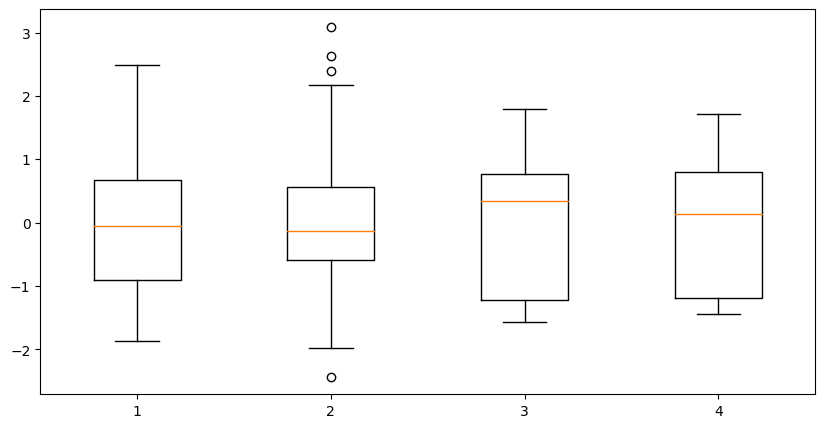

In [43]:
plt.figure(figsize=(10,5))
plt.boxplot(x_scalar)

<Axes: >

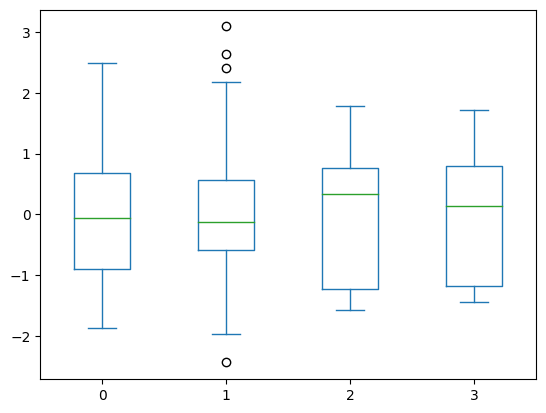

In [44]:
pd.DataFrame(x_scalar).plot(kind='box')


In [45]:
x_train,x_test,y_train,y_test = train_test_split(x_scalar, y, random_state=42, test_size=0.3)

In [46]:
x_train

array([[-4.16009689e-01, -1.51316008e+00, -3.29657076e-02,
        -2.62386821e-01],
       [ 5.53333275e-01, -5.92373012e-01,  7.62758269e-01,
         3.95774101e-01],
       [ 6.74501145e-01,  9.82172869e-02,  9.90107977e-01,
         7.90670654e-01],
       [ 9.16836886e-01, -1.31979479e-01,  3.64896281e-01,
         2.64141916e-01],
       [ 1.64384411e+00,  1.24920112e+00,  1.33113254e+00,
         1.71209594e+00],
       [-1.73673948e-01, -3.62176246e-01,  2.51221427e-01,
         1.32509732e-01],
       [ 2.12851559e+00, -1.31979479e-01,  1.61531967e+00,
         1.18556721e+00],
       [-2.94841818e-01, -1.31979479e-01,  4.21733708e-01,
         3.95774101e-01],
       [-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [ 2.24968346e+00, -5.92373012e-01,  1.67215710e+00,
         1.05393502e+00],
       [-5.25060772e-02, -8.22569778e-01,  1.94384000e-01,
        -2.62386821e-01],
       [-7.79513300e-01,  7.88807586e-01, -1.34022653e+00,
      

In [47]:
X[X.columns[[0, 1, 2]]]


,sepal length (cm),sepal width (cm),petal length (cm)
0,5.1,3.5,1.4
1,4.9,3.0,1.4
2,4.7,3.2,1.3
3,4.6,3.1,1.5
4,5.0,3.6,1.4
...,...,...,...
145,6.7,3.0,5.2
146,6.3,2.5,5.0
147,6.5,3.0,5.2
148,6.2,3.4,5.4


In [48]:
# make combinations
accuracy = []
for i in range(X.shape[1]):
    combinations = []
    for j in range(X.shape[1]):
        if i != j:
            combinations.append(j)
    newDataSet = X[X.columns[[combinations[0], combinations[1], combinations[2]]]]
    x_scalar = StandardScaler().fit_transform(newDataSet)
    x_train,x_test,y_train,y_test = train_test_split(x_scalar, y, random_state=42, test_size=0.3)
    model = GaussianNB().fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy.append(accuracy_score(y_test, y_pred))

accuracy

c:\Application\Python\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Application\Python\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Application\Python\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Application\Python\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

[0.9777777777777777, 1.0, 0.9333333333333333, 0.8888888888888888]

In [49]:
X = pd.DataFrame(load_wine().data, columns=load_wine().feature_names)
y = pd.DataFrame(load_wine().target, columns=['category'])

accuracy = []
a = []
for i in range(X.shape[1]):
    for j in range(i + 1, X.shape[1] - 1):
        a.append(i)
        a.append(j)
        a.append(j + 1)
        newDataSet = X[X.columns[[a[0], a[1], a[2]]]]
        x_scalar = StandardScaler().fit_transform(newDataSet)
        x_train,x_test,y_train,y_test = train_test_split(x_scalar, y, random_state=42, test_size=0.3)
        model = GaussianNB().fit(x_train, y_train)
        y_pred = model.predict(x_test)
        accuracy.append(accuracy_score(y_test, y_pred) * 100)
        a = []
        
accuracy


c:\Application\Python\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Application\Python\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Application\Python\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Application\Python\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

[77.77777777777779,
 88.88888888888889,
 87.03703703703704,
 88.88888888888889,
 92.5925925925926,
 90.74074074074075,
 83.33333333333334,
 88.88888888888889,
 92.5925925925926,
 90.74074074074075,
 92.5925925925926,
 74.07407407407408,
 68.51851851851852,
 75.92592592592592,
 81.48148148148148,
 81.48148148148148,
 64.81481481481481,
 77.77777777777779,
 83.33333333333334,
 72.22222222222221,
 94.44444444444444,
 64.81481481481481,
 79.62962962962963,
 81.48148148148148,
 85.18518518518519,
 61.111111111111114,
 81.48148148148148,
 85.18518518518519,
 79.62962962962963,
 92.5925925925926,
 79.62962962962963,
 85.18518518518519,
 87.03703703703704,
 61.111111111111114,
 81.48148148148148,
 85.18518518518519,
 74.07407407407408,
 92.5925925925926,
 81.48148148148148,
 87.03703703703704,
 70.37037037037037,
 85.18518518518519,
 87.03703703703704,
 75.92592592592592,
 92.5925925925926,
 83.33333333333334,
 79.62962962962963,
 83.33333333333334,
 83.33333333333334,
 79.62962962962963,
 90.

<Figure size 1600x600 with 0 Axes>

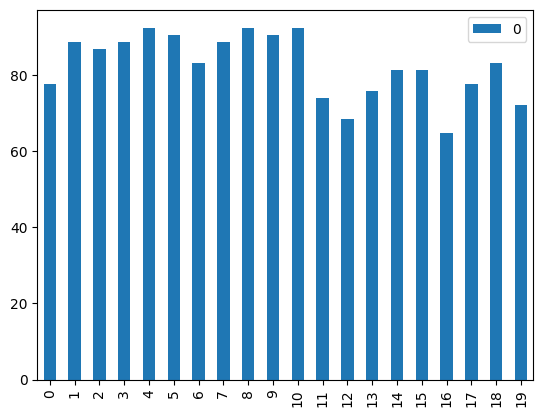

In [50]:
plt.figure(figsize=(16,6))
pd.DataFrame(accuracy).head(20).plot(kind='bar')
plt.show()